# GSAS-II: Pattern Simulation

In [1]:
%matplotlib inline
import G2script as G2
import matplotlib.pyplot as plt
import numpy as np

setting up GSASIIscriptable from /home/edgar/work/g2home
Python gitpython module not installed
GSAS-II binary directory: /home/edgar/work/g2home/bindist


#### Create the project

In [2]:
PROJECT_NAME = 'projects/gsas_simulation.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_simulation.gpx


#### Import a CIF file

In [3]:
ph_magnetite = gpx.add_phase(
    phasename='magnetite',
    phasefile="cif/Fe3O4_3.cif",
    fmthint="CIF",
)

/home/edgar/work/gsasii_tutorials/cif/Fe3O4_3.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_simulation.gpx


#### Generate an histogram with the subsequent simulated diffractogram

In [4]:
hist = gpx.add_simulated_powder_histogram(
    histname="simulation",
    iparams="cuka.instprm",
    Tmin=20,
    Tmax=80,
    Npoints=3000,
    phases=gpx.phases(),
)

Simulating 3000 points from 20 to 80 degrees 2theta
Instrument parameters read: /home/edgar/work/gsasii_tutorials/cuka.instprm (G2 fmt) bank 1


#### Refine (generate an artificial diffractogram)

In [5]:
gpx.do_refinements()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_simulation.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 4286 with 3000 obs.
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_simulation.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_simulation.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_simulation.lst
 ***** Refinement successful *****


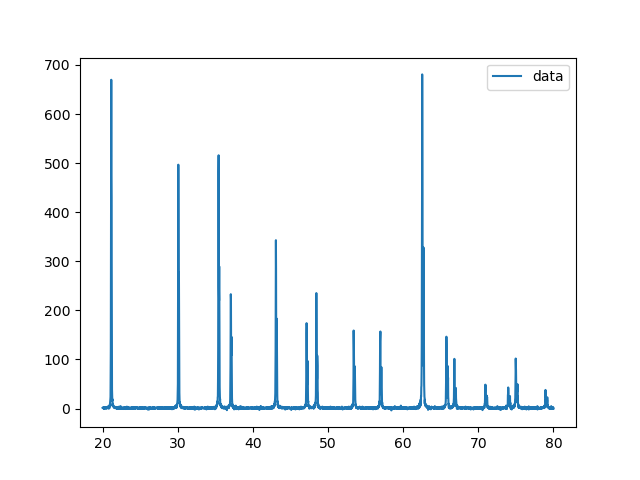

In [6]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata("X"), hist.getdata("yobs"), label="data")
ax.legend()
pass

#### Save the diffractogram

In [7]:
hist.Export(
    fileroot="magnetite_simulation",
    extension=".csv",
    fmthint="hist",
)

Powder data written to CSV file /home/edgar/work/gsasii_tutorials/magnetite_simulation.csv


'/home/edgar/work/gsasii_tutorials/magnetite_simulation.csv'